In [93]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [94]:
designs = pd.read_json("/home/mchrnwsk/chronowska-stam-wood-2024-protein-design-archive/data/20250201_data_curated.json")

In [95]:
growth = designs[["pdb", "release_date"]]

In [96]:
for index, date in enumerate(growth["release_date"].values):
    growth.loc[index, "year"] = date.split("-")[0]

/tmp/ipykernel_35314/3167794856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  growth.loc[index, "year"] = date.split("-")[0]


In [97]:
growth.drop(["release_date"], axis=1)

,pdb,year
0,1abz,1998
1,1al1,1991
2,1bb1,1999
3,1byz,1998
4,1coi,1997
...,...,...
1552,9iz6,2024
1553,9j7t,2024
1554,9ju1,2024
1555,9kku,2024


In [98]:
value_counts_pdb = growth["year"].value_counts()
value_counts_df = value_counts_pdb.reset_index()
value_counts_df.columns = ["year", "count"]

In [99]:
sorted_df = value_counts_df.sort_values(by="year")

In [100]:
percentage_growth = sorted_df.copy()
percentage_growth["growth_rate"] = percentage_growth["count"].pct_change(periods=1) * 100

In [101]:
sorted_df["cumulative"] = sorted_df["count"].cumsum()

In [102]:
fixed = sorted_df[:-1].copy()

In [103]:
start_year = 1997
split_year = 2010
years = np.array(fixed["year"])
years = years.astype("int64")
cumulative = np.array(fixed["cumulative"])
cumulative = cumulative.astype("int64")

In [104]:
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams.update({"font.size": 7})

/tmp/ipykernel_35314/3465933932.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  growth["year"] = growth["release_date"].apply(lambda x: int(x.split("-")[0]))
/tmp/ipykernel_35314/3465933932.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  growth.drop(["release_date"], axis=1, inplace=True)


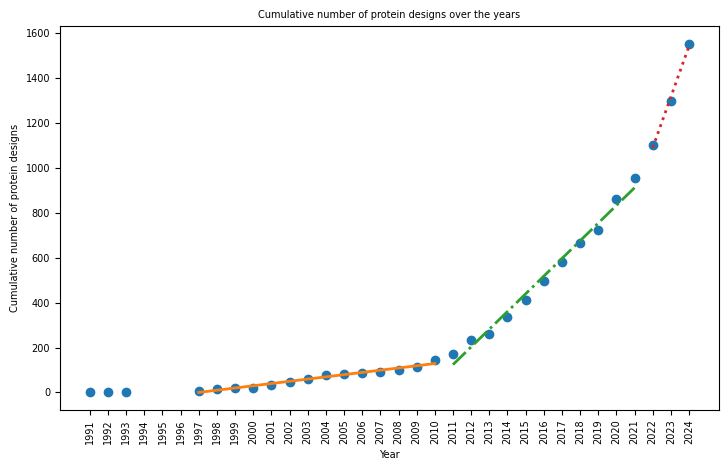

Region 1 fit parameters:
  Slope: 9.876923076923077
  Intercept: -19723.84395604396
  R-squared: 0.9718865614641601
  p-value: 1.1274430458844851e-10
  Standard error: 0.48493132990026033
Region 2 fit parameters:
  Slope: 78.60909090909091
  Intercept: -157958.83636363636
  R-squared: 0.98583594568282
  p-value: 1.2463946997143428e-09
  Standard error: 3.1408195546302076
Region 3 fit parameters:
  Slope: 226.0
  Intercept: -455884.0
  R-squared: 0.9941606976019933
  p-value: 0.04869497832952628
  Standard error: 17.320508075688508


In [126]:
# Set breakpoints for plotting!
start_year = 1997
split_year = 2010
split_year_2 = 2021

# Read in data and extract only relevant columns
designs = pd.read_json("/home/mchrnwsk/pda-destress-analysis/data/20250201_data_curated.json")
growth = designs[["pdb", "release_date"]]

# Extract just the year of release from full date
growth["year"] = growth["release_date"].apply(lambda x: int(x.split("-")[0]))
growth.drop(["release_date"], axis=1, inplace=True)

# Calculate cumulative total of designs per year
value_counts_pdb = growth["year"].value_counts()
value_counts_df = value_counts_pdb.reset_index()
value_counts_df.columns = ["year", "count"]
sorted_df = value_counts_df.sort_values(by="year")

# Compute cumulative sum of designs released
sorted_df["cumulative"] = sorted_df["count"].cumsum()

# Remove current year because numbers are incomplete
fixed = sorted_df[:-1].copy()

# Convert data types for plotting
years = fixed["year"].to_numpy()
cumulative = fixed["cumulative"].to_numpy()

# Set masks for regions to fit
region1_mask = (years <= split_year) & (years >= start_year)
region2_mask = (years > split_year) & (years <= split_year_2)
region3_mask = (years > split_year_2)

years_region1 = years[region1_mask]
cumulative_region1 = cumulative[region1_mask]
years_region2 = years[region2_mask]
cumulative_region2 = cumulative[region2_mask]
years_region3 = years[region3_mask]
cumulative_region3 = cumulative[region3_mask]

# Fit linear models to each region
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(years_region1, cumulative_region1)
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(years_region2, cumulative_region2)
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(years_region3, cumulative_region3)

# Generate predictions for each region
years_fit1 = np.linspace(years_region1.min(), years_region1.max(), 100)
years_fit2 = np.linspace(years_region2.min(), years_region2.max(), 100)
years_fit3 = np.linspace(years_region3.min(), years_region3.max(), 100)
fit_line1 = slope1 * years_fit1 + intercept1
fit_line2 = slope2 * years_fit2 + intercept2
fit_line3 = slope3 * years_fit3 + intercept3

# For single column
#plt.rcParams["figure.figsize"] = [3.54, 3.54]
#fig, ax = plt.subplots(figsize=(3.54, 3.54))  # 90 mm x 90 mm
# For double column
#plt.rcParams["figure.figsize"] = [7.09, 4.50]
fig, ax = plt.subplots(figsize=(7.09, 4.5))  # 180 mm width, adjust height
plt.margins(0.05)  # Remove margins around data
plt.rcParams["figure.autolayout"] = True

ax.scatter(years, cumulative, label="Cumulative number of protein designs", marker="o", color="#1f77b4")

# Plot the fitted lines for each region
ax.plot(years_fit1, fit_line1, label='Dominance of minimal and rational approaches', color="#ff7f0e", linestyle="-", linewidth=2)
ax.plot(years_fit2, fit_line2, label='Dominance of computational, physics-based approaches', color="#2ca02c", linestyle="-.", linewidth=2)
ax.plot(years_fit3, fit_line3, label='Emergence of computational, deep learning-based approaches', color="#d62728", linestyle=":", linewidth=2)

# Manually set x-axis ticks for every year
plt.xticks(np.arange(years.min(), years.max() + 1, 1), rotation=90)

# Labels and legend
plt.xlabel('Year')
plt.ylabel('Cumulative number of protein designs')
plt.title('Cumulative number of protein designs over the years')
#plt.legend()
#plt.grid(True)
ax.grid(False)
plt.tight_layout(pad=0.0)

# Save and show
plt.savefig("/home/mchrnwsk/chronowska-stam-wood-2024-protein-design-archive/Graphs/20250201_cumulative_growth_test.svg", dpi=300, bbox_inches="tight", pad_inches=0, transparent=True )
plt.show()

# Print parameters and statistics
print("Region 1 fit parameters:")
print("  Slope:", slope1)
print("  Intercept:", intercept1)
print("  R-squared:", r_value1**2)
print("  p-value:", p_value1)
print("  Standard error:", std_err1)

print("Region 2 fit parameters:")
print("  Slope:", slope2)
print("  Intercept:", intercept2)
print("  R-squared:", r_value2**2)
print("  p-value:", p_value2)
print("  Standard error:", std_err2)

print("Region 3 fit parameters:")
print("  Slope:", slope3)
print("  Intercept:", intercept3)
print("  R-squared:", r_value3**2)
print("  p-value:", p_value3)
print("  Standard error:", std_err3)

In [29]:
split_years = [2000, 2010]
years = np.array(fixed["year"])
years = years.astype("int64")
cumulative = np.array(fixed["cumulative"])
cumulative = cumulative.astype("int64")